<a href="https://colab.research.google.com/github/Zen0007/transformer_NLP/blob/main/transformer_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d kreeshrajani/human-stress-prediction

  0% 0.00/554k [00:00<?, ?B/s]
100% 554k/554k [00:00<00:00, 136MB/s]


In [2]:
!unzip "/content/human-stress-prediction.zip" -d "/content/dataset/"

Archive:  /content/human-stress-prediction.zip
  inflating: /content/dataset/Stress.csv  


In [3]:
import numpy as np
import pandas as pd
import re
from PIL import Image
import spacy
import nltk
import string
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow. keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import *
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from sklearn.model_selection import train_test_split
nlp = spacy.load("en_core_web_sm")


In [4]:
dataset = pd.read_csv('/content/dataset/Stress.csv')
dataset[['text','label']]

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


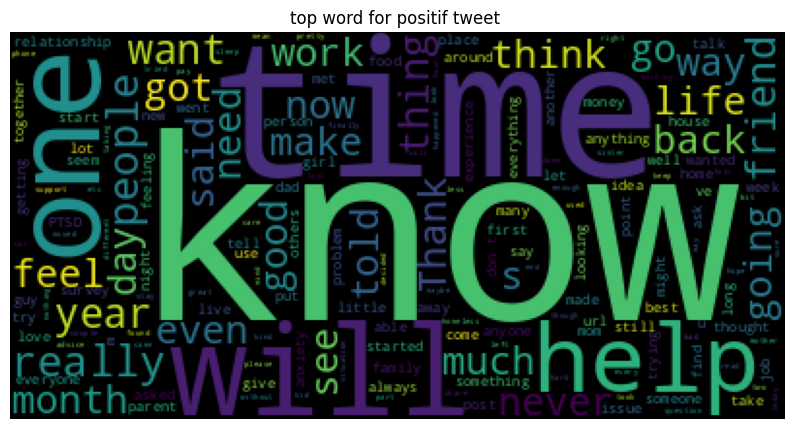

In [5]:
wc = WordCloud(background_color='black',
               max_words=200,

               )
wc.generate(' '.join(text for text in dataset.loc[dataset['label']== 0 , 'text']))
plt.figure(figsize=(10,10))
plt.title('top word for positif tweet ')
plt.imshow(wc)
plt.axis('off')
plt.show()

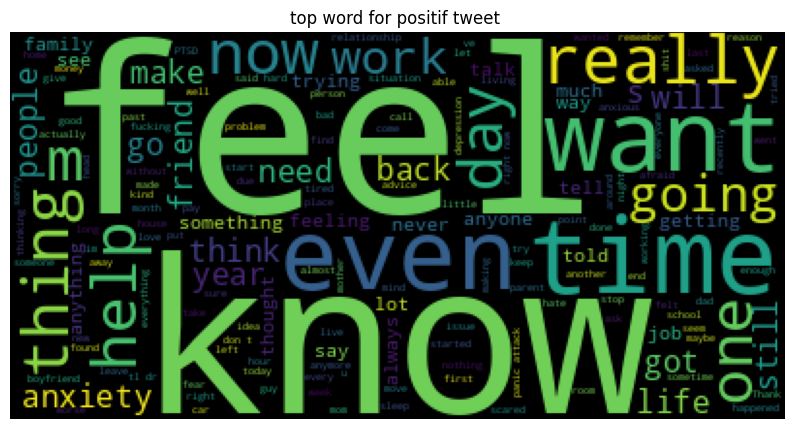

In [6]:
wc = WordCloud(
               background_color='black',
               max_words=300,
              ).generate(' '.join(text for text in dataset.loc[dataset['label']== 1 , 'text']))


plt.figure(figsize=(10,10))
plt.title('top word for positif tweet ')
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
def clean_dateset (text):
  text = text.lower()
  text = re.sub(r'https?://\S+|www\.\S+|http?"//\S+',' ',text)
  text = re.sub(r'<.*?>',' ',text)
  text = re.sub(r'\x89\s+',' ',text)
  text = re.sub(r'\w*\d\w*',' ',text)
  text = re.sub(r'[^\w\s]',' ',text)
  texts = re.compile("["
                       u"\U0001F600-\U0001F64F"
                       u"\U0001F300-\U0001F5FF"
                       u"\U0001F680-\U0001F6FF"
                       u"\U0001F1E0-\U0001F1FF"
                       u"\U00002500-\U00002BEF"
                       u"\U00002702-\U000027B0"
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\U00010000-\U0010ffff"
                       u"\u2640-\u2642"
                       u"\u2600-\u2B55"
                       u"\u200d"
                       u"\u23cf"
                       u"\u23e9"
                       u"\u231a"
                       u"\ufe0f"
                       u"\u3030"
                       "]+", flags=re.UNICODE)
  text = texts.sub(r' ', text)

  return text

def stiring(text):
  text = list(text.lower().split(" "))
  return text

dataset['text'] = dataset['text'].apply(clean_dateset)
dataset['clean_text'] = dataset['text'].apply(stiring)
dataset['text'] = dataset['text'].apply(clean_dateset)
dataset['clean_text'] = dataset['text'].apply(stiring)

In [8]:
dataset = dataset[['text','clean_text','label']]
print(dataset.text[0])
print(dataset.clean_text[0])

he said he had not felt that way before  suggeted i go rest and so   trigger ahead if youi re a hypocondriac like me  i decide to look up  feelings of doom  in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy  a stupid  are you psychic  test or new age b s   something i could even laugh at down the road  no  i ended up reading that this sense of doom can be indicative of various health ailments  one of which i am prone to   so on top of my  doom  to my gloom  i am now f n worried about my heart  i do happen to have a physical in   hours 
['he', 'said', 'he', 'had', 'not', 'felt', 'that', 'way', 'before', '', 'suggeted', 'i', 'go', 'rest', 'and', 'so', '', '', 'trigger', 'ahead', 'if', 'youi', 're', 'a', 'hypocondriac', 'like', 'me', '', 'i', 'decide', 'to', 'look', 'up', '', 'feelings', 'of', 'doom', '', 'in', 'hopes', 'of', 'maybe', 'getting', 'sucked', 'into', 'some', 'rabbit', 'hole', 'of', 'ludicrous', 'conspiracy', '', 'a', 'stupid', '', 'are', 'you', 'p

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
data_1 = dataset.copy()

In [13]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def preprocess_1(texts):
   text = []
   doct = nlp(texts)
   ents = [e.text for e in doct.ents]
   for item in doct :
      if item.text in ents:
       pass
      else :
        text.append(item.text)
   doc = (" ".join(text))
   doc = doc.lower().strip()
   doc = doc.replace("</br>"," ")
   doc = doc.replace("-"," ")
   doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
   doc = " ".join([token for token  in doc.split() if token not in stopwords])
   doc = "".join([lemmatizer.lemmatize(word) for word in doc])
   return doc


In [15]:
data_1['clean_text'] = data_1.text.apply(lambda x : preprocess_1(x))
data_1[['clean_text','label']]

,clean_text,label
0,said felt way suggeted rest trigger ahead youi...,1
1,hey r assistance sure right place post goes m ...,0
2,mom hit newspaper shocked knows don t like pla...,1
3,met new boyfriend amazing kind sweet good stud...,1
4,domestic violence awareness month domestic vio...,1
...,...,...
2833,week ago precious ignored jan happy precious h...,0
2834,t ability cope anymore m trying lot things tri...,1
2835,case time reading post looking people willing ...,0
2836,normal good relationship main problem mom jail...,0


In [22]:
test_seq = tokenizer.texts_to_sequences(data_1.clean_text)
data_1_train = pad_sequences(test_seq,maxlen=50,padding='post',truncating='post')

In [23]:
def preprocess_2(text):
  doc = nlp(text)
  processed_token = []
  for token in doc :
    if not token.is_punct and not token.is_stop:
       processed_token.append(token.lemma_)
  precessed_text = " ".join(processed_token)
  return  precessed_text
data_2 = dataset.copy()
data_2['clean_text'] = data_2.text.apply(lambda x : preprocess_2(x))

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_2.clean_text)
vocab_size = len(tokenizer.word_index)+1
print(f"len {vocab_size}")

len 8266


In [25]:
test_seq = tokenizer.texts_to_sequences(data_2.text)
data_2_train = pad_sequences(test_seq,maxlen=50,padding='post',truncating='post')

print(data_2_train.shape)

(2838, 50)


In [21]:
data1 = tokenizer.texts_to_sequences(dataset.clean_text)
data1 = pad_sequences(data1,maxlen=50,padding='post',truncating='post')
vocab_size = len(tokenizer.word_index)+1
print(f"len {vocab_size}")
print(data1.shape)

len 8266
(2838, 50)


In [26]:
from tensorflow.keras import layers
class TrasformerBlock(layers.Layer):
     def __init__ (self,embed_dim,num_heads,ff_dim,rate=0.1):
         super().__init__()
         self.att = layers.MultiHeadAttention(num_heads=num_heads,key_dim=embed_dim)
         self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim,activation="relu"),layers.Dense(embed_dim),]
         )
         self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
         self.layersnorm2 = layers.LayerNormalization(epsilon=1e-6)
         self.dropout1 = layers.Dropout(rate)
         self.dropout2 = layers.Dropout(rate)
     def call(self,inputs,training):
         attn_output = self.att(inputs,inputs)
         attn_output = self.dropout1(attn_output,training=training)
         out1 = self.layernorm1(inputs + attn_output)
         ffn_output = self.ffn(out1)
         ffn_output = self.dropout2(ffn_output,training=training)
         return self.layersnorm2(out1 + ffn_output)

In [27]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self,maxlen,vocab_size,embed_dim):
       super().__init__()
       self.token_emb = layers.Embedding(input_dim=vocab_size,output_dim=embed_dim)
       self.pos_emb = layers.Embedding(input_dim = maxlen,output_dim = embed_dim)
    def call(self,x):
      maxlen = tf.shape(x)[-1]
      position = tf.range(start=0,limit=maxlen,delta=1)
      position = self.pos_emb(position)
      x = self.token_emb(x)
      return  x + position

In [52]:
def model_transformer(maxlen=50,vocab_size=11210,embed_dim=32,num_heads = 2,ff_dim=32,dropout=0.5):
    input_ids = tf.keras.layers.Input(shape=(maxlen))
    embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size,embed_dim)
    x = embedding_layer(input_ids)
    transformer_block = TrasformerBlock(embed_dim,num_heads,ff_dim)
    x = transformer_block(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x  = tf.keras.layers.Dense(32,activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.55)(x)
    output = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)

    model = tf.keras.Model(inputs =input_ids, outputs = output)
    model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(0.0003),
              metrics = ["accuracy"]
              )
    model.summary()
    return model

In [91]:
model = model_transformer(maxlen=50,vocab_size=11210,embed_dim=32,num_heads = 2,ff_dim=32,dropout=0.65)
model.fit(data1,dataset.label,
                epochs=10,
                #validation_data=[X_val,y_val],
                batch_size = 18,
                )

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 50)]              0         
                                                                 
 token_and_position_embeddi  (None, 50, 32)            360320    
 ng_13 (TokenAndPositionEmb                                      
 edding)                                                         
                                                                 
 trasformer_block_13 (Trasf  (None, 50, 32)            10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1  (None, 32)                0         
 3 (GlobalAveragePooling1D)                                      
                                                                 
 dropout_54 (Dropout)        (None, 32)                0  

In [92]:
model_2 = model_transformer(maxlen=50,vocab_size=11210,embed_dim=32,num_heads = 2,ff_dim=32,dropout=0.75)
model_2.fit(data1,dataset.label,
                epochs=10,
                #validation_data=[X_val,y_val],
                batch_size = 18,
                )

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 50)]              0         
                                                                 
 token_and_position_embeddi  (None, 50, 32)            360320    
 ng_14 (TokenAndPositionEmb                                      
 edding)                                                         
                                                                 
 trasformer_block_14 (Trasf  (None, 50, 32)            10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1  (None, 32)                0         
 4 (GlobalAveragePooling1D)                                      
                                                                 
 dropout_58 (Dropout)        (None, 32)                0  

In [93]:
def predict(text):
   text = preprocess_1(text)
   Text = tokenizer.texts_to_sequences(text)
   pred = pad_sequences(Text,maxlen=50,padding='post',truncating='post')
   prd = model.predict(pred)
   print(prd[0])
   print(prd[1])
   print(prd[-0])
   print(prd[-1])


In [95]:
text = "Feeling overwhelmed with work deadlines and family responsibilities Need a break!"
text0 = "hey r assistance   sure right place post marketing outreach effort school recruit country   look current undergrad grad stem student stem student know stem student   greatly appreciate help pass short survey   thank   help survey enter drawing chance win     amazon gcs"
text1 = "Why is everything falling apart when I need it to hold together?"

text2 = "Grateful for the love and support of my friends and family. Life is good."
text3 = "ust finished a breathing exercises make such a difference in my day. Inner peace is a priority"
text4 = "Just had a great workout at the gym. Feeling strong and energized!"
text5 = "Spent the weekend hiking in the mountains. Nature is so calming."
text6 = "Sitting by the beach, listening to the waves, and watching the sunset. Life is beautiful Finally, a well-deserved vacation! Time to unwind and recharge"

print(predict(text))
print(predict(text0))
print(predict(text1))
print(predict(text2))
print(predict(text3))
print(predict(text4))
print(predict(text5))
print(predict(text6))

3/3 [==============================] - 0s 8ms/step
[0.42148438]
[0.05701655]
[0.42148438]
[0.01540956]
None
8/8 [==============================] - 0s 5ms/step
[0.27029204]
[0.05701655]
[0.27029204]
[0.04381293]
None
1/1 [==============================] - 0s 47ms/step
[0.42148438]
[0.06897663]
[0.42148438]
[0.03944891]
None
2/2 [==============================] - 0s 10ms/step
[0.02749422]
[0.02740911]
[0.02749422]
[0.0394489]
None
2/2 [==============================] - 0s 7ms/step
[0.42148438]
[0.06897663]
[0.42148438]
[0.01523138]
None
2/2 [==============================] - 0s 6ms/step
[0.00692804]
[0.0133823]
[0.00692804]
[0.0394489]
None
2/2 [==============================] - 0s 6ms/step
[0.04381293]
[0.01959214]
[0.04381293]
[0.0274942]
None
4/4 [==============================] - 0s 4ms/step
[0.04381293]
[0.06897663]
[0.04381293]
[0.05701655]
None


In [98]:
y_pred = model.predict(data_1_train)
y_pred = y_pred.astype('float64')
y_pred.shape

89/89 [==============================] - 1s 6ms/step


(2838, 1)

In [99]:
predict = (y_pred > 0.1).astype(int)
result = pd.DataFrame()
result['text'] = dataset['text']
result['label'] = dataset['label']
result['Predict'] = predict
result

,text,label,Predict
0,he said he had not felt that way before sugge...,1,1
1,hey there r assistance not sure if this is th...,0,0
2,my mom then hit me with the newspaper and it s...,1,1
3,until i met my new boyfriend he is amazing h...,1,1
4,october is domestic violence awareness month a...,1,1
...,...,...,...
2833,her a week ago precious how are you i i...,0,0
2834,i don t have the ability to cope with it anymo...,1,1
2835,in case this is the first time you re reading ...,0,0
2836,do you find this normal they have a good rela...,0,0


In [100]:
sum = (result['Predict'] == result['label']).sum()
sumary = (sum / len(result))*100
print(f"{sumary} %")

97.85059901338971 %


In [104]:
Y_pred = model_2.predict(data_2_train)
Y_pred = Y_pred.astype('float64')
Y_pred.shape

89/89 [==============================] - 0s 5ms/step


(2838, 1)

In [105]:
predict = (Y_pred > 0.1).astype(int)
result = pd.DataFrame()
result['text'] = dataset['text']
result['label'] = dataset['label']
result['Predict'] = predict
Result = result
Result

,text,label,Predict
0,he said he had not felt that way before sugge...,1,1
1,hey there r assistance not sure if this is th...,0,0
2,my mom then hit me with the newspaper and it s...,1,1
3,until i met my new boyfriend he is amazing h...,1,1
4,october is domestic violence awareness month a...,1,1
...,...,...,...
2833,her a week ago precious how are you i i...,0,0
2834,i don t have the ability to cope with it anymo...,1,1
2835,in case this is the first time you re reading ...,0,0
2836,do you find this normal they have a good rela...,0,0


In [106]:
sum = (Result['Predict'] == Result['label']).sum()
sumary = (sum / len(Result))*100
print(f"{sumary} %")

94.00986610288936 %
